![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


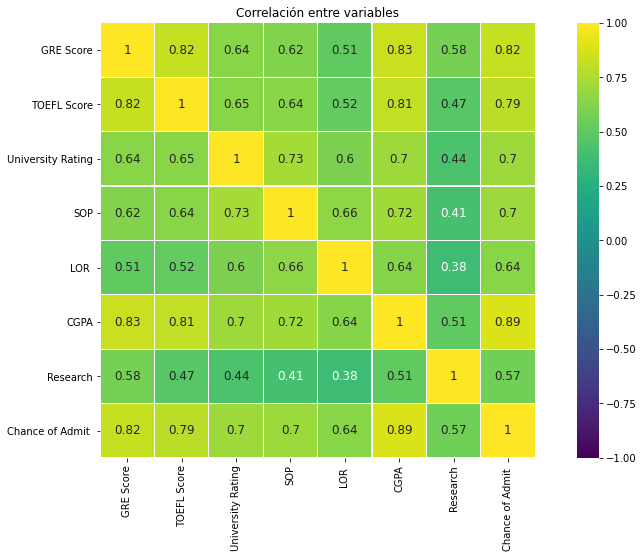

In [4]:
import seaborn as sns

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
plt.title("Correlación entre variables")
sns.heatmap(corr[(corr >= 0.0) | (corr <= -0)],
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 12}, square=True);

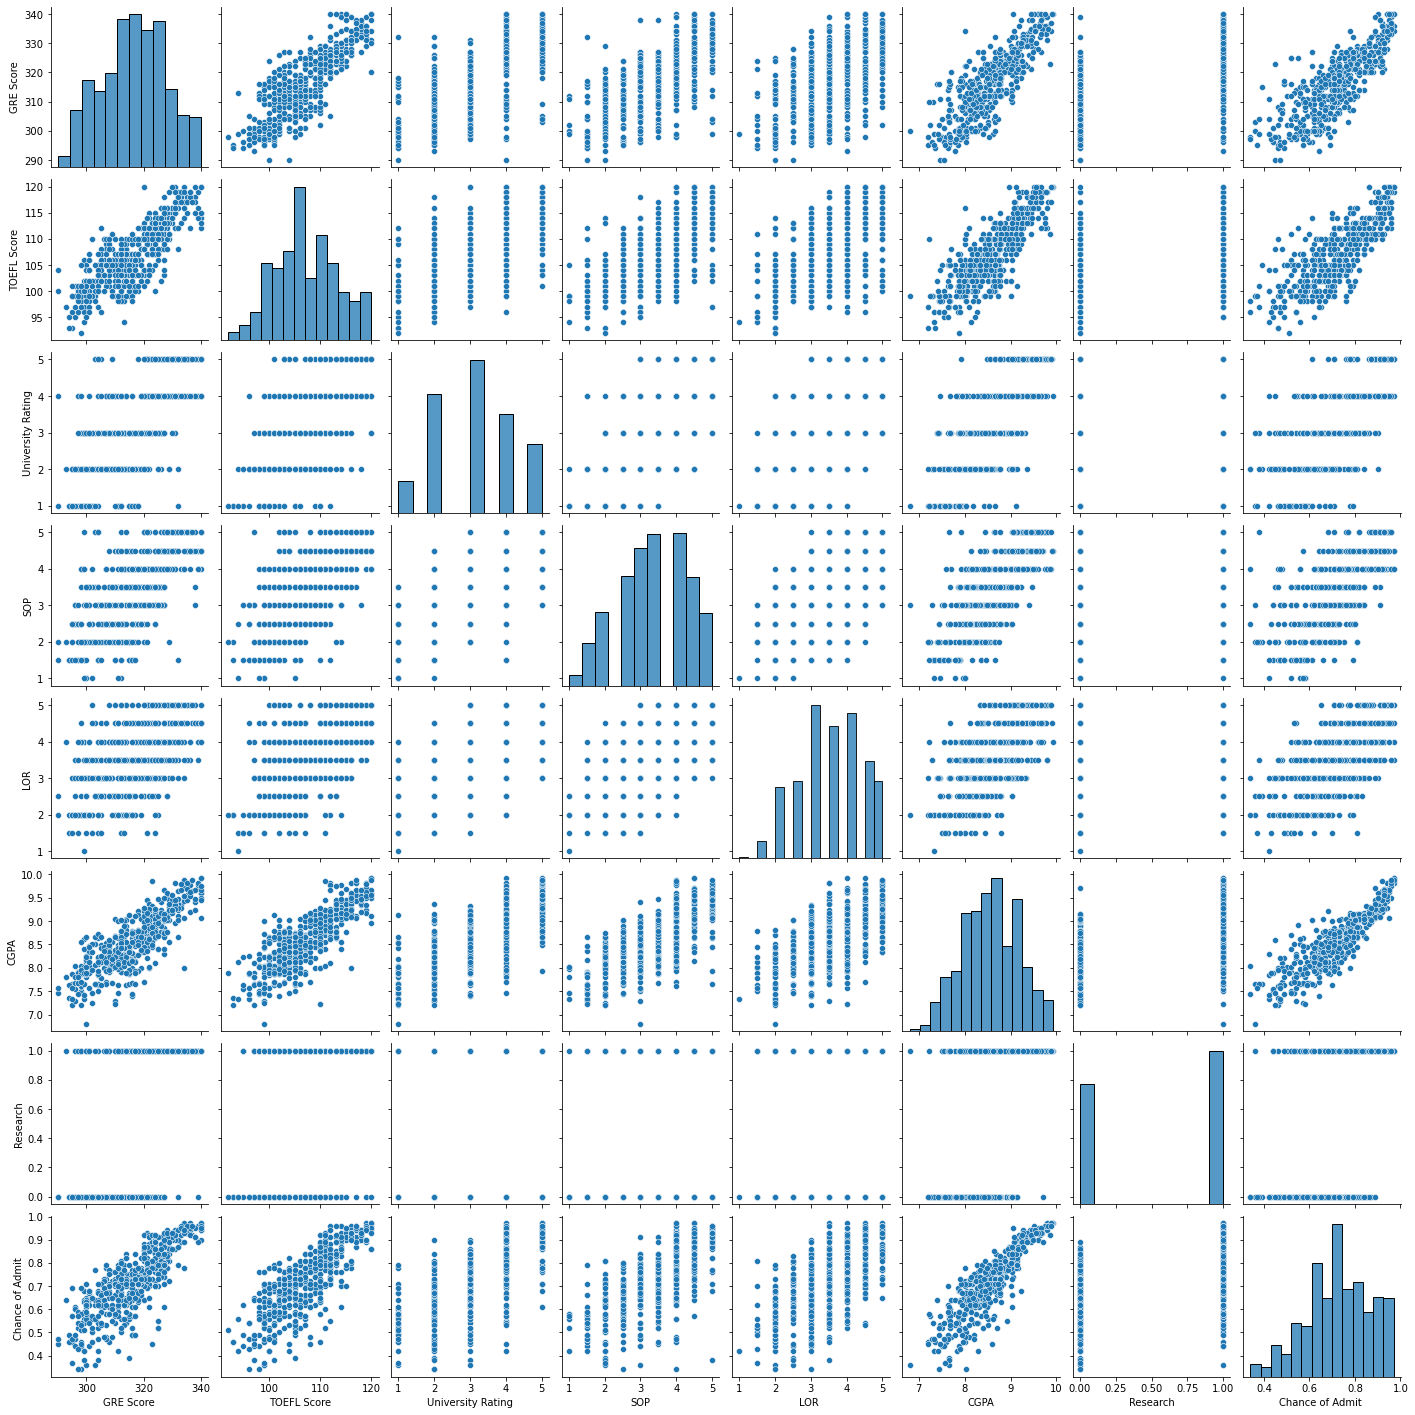

In [5]:
sns.pairplot(data)

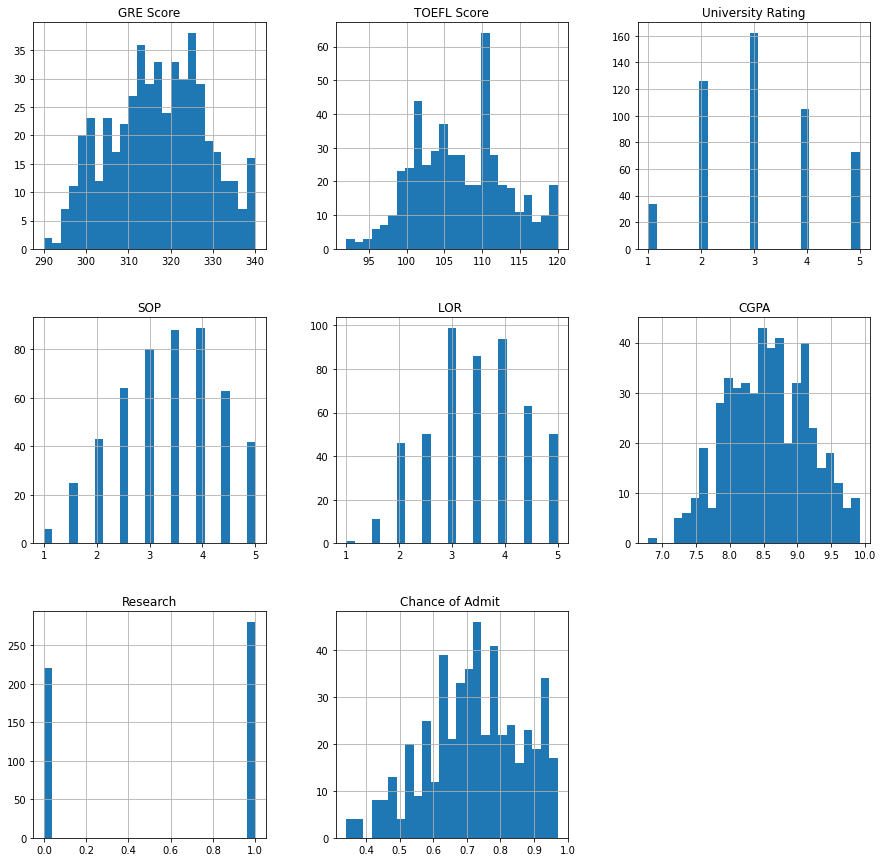

In [6]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
# Comprobar que los datos se distribuyen de manera normal
import numpy as np
from scipy.stats import normaltest
for k in X.columns:
    # Realiza la prueba de normalidad
    stat, p = normaltest(X[k])
    # Imprime la p-value
    print('p-value =', p)
    # Evalúa la p-value
    if p < 0.05:
        print('Los datos para la variable {} no se distribuyen normalmente.'.format(k))
    else:
        print('Los datos para la variable {} se distribuyen normalmente.'.format(k))

p-value = 1.9205080572479553e-06
Los datos para la variable GRE Score no se distribuyen normalmente.
p-value = 3.24877511690625e-05
Los datos para la variable TOEFL Score no se distribuyen normalmente.
p-value = 7.229797762563391e-10
Los datos para la variable University Rating no se distribuyen normalmente.
p-value = 3.210143902779084e-07
Los datos para la variable SOP no se distribuyen normalmente.
p-value = 8.472184961452618e-08
Los datos para la variable LOR  no se distribuyen normalmente.
p-value = 0.0018221915300750521
Los datos para la variable CGPA no se distribuyen normalmente.
p-value = 0.0
Los datos para la variable Research no se distribuyen normalmente.


In [10]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [11]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

1  output variables


In [12]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [13]:
# Celda 1
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

K.clear_session()
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(optimizer='sgd', loss='mean_squared_error')

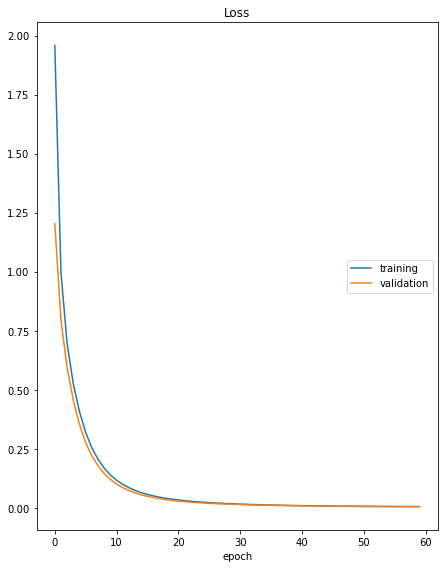

Loss
	training         	 (min:    0.005, max:    1.958, cur:    0.005)
	validation       	 (min:    0.004, max:    1.203, cur:    0.004)
11/11 [==============================] - 0s 33ms/step - loss: 0.0050 - val_loss: 0.0044


In [15]:
# Entrenamiento de la red neuronal con 60 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=60, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular la predicción del modelo en el conjunto de prueba
yPred = model.predict(xTest)

# Calcular el MSE y el MAE en el conjunto de prueba
mse = mean_squared_error(yTest, yPred)
mae = mean_absolute_error(yTest, yPred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

5/5 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 0.004386794549064612
Mean Absolute Error (MAE): 0.0490666765054067


Se selecciono como función de perdida el MSE dado que es es la métrica de uso recurrente en la evaluación de modelos de regresión, adicionalmente, esta métrica le otorga un mayor castigo a los errores de gran magnitud por lo que en esta ocasión nos interesaria esa aproximación debido a la naturaleza de la variable regresada. Luego nuestro optimizador seleccionado es el SGD (Stochastic Gradient Descent) dado su velocidad de convergencia y además reduce la varianza en las actualizaciones de los pesos, es menos propenso a atascarse en minimos locales en comparación con el resto de optimizadores (tales como el Adam y RMSprop).

Respecto a los epochs, utilizamos 50, pero graficamente no se observaba dicha convergencia, por ende decidimos aumentar a 60 para lograr dicha visualización.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [18]:
K.clear_session()
model = Sequential()

# Agregar una capa densa con 64 neuronas y función de activación relu como primera capa oculta
model.add(Dense(22, activation='sigmoid', input_shape=(dims,)))

# Agregar una segunda capa densa
model.add(Dense(output_var, activation='relu'))

# Compilar el modelo con el optimizador Adam y la función de pérdida mean_squared_error
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                176       
                                                                 
 dense_1 (Dense)             (None, 1)                 23        
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


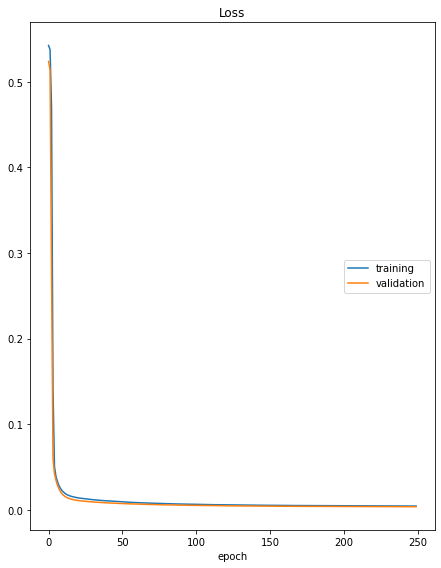

Loss
	training         	 (min:    0.004, max:    0.542, cur:    0.004)
	validation       	 (min:    0.004, max:    0.524, cur:    0.004)
11/11 [==============================] - 0s 31ms/step - loss: 0.0043 - val_loss: 0.0035


In [19]:
# Entrenar el modelo con 100 épocas, conjunto de entrenamiento y validación, y livelossplot como callback
model.fit(xTrain, yTrain, epochs=250, verbose=1, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular la predicción del modelo en el conjunto de prueba
yPred = model.predict(xTest)

# Calcular el MSE y el MAE en el conjunto de prueba
mse2 = mean_squared_error(yTest, yPred)
mae2 = mean_absolute_error(yTest, yPred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse2}")
print(f"Mean Absolute Error (MAE): {mae2}")

5/5 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.0035113843266233215
Mean Absolute Error (MAE): 0.04340399056275686


Con base en el primer punto, tomaremos el mismo optimizador y función de perdida. Respecto a las funciones de activación, se utilizó la función de activación sigmoid en la primer capa de la red neuronal, dado que es una de las que comúnmente se utiliza debido a que esta función puede procesar valores de entrada dentro del rango de 0 a 1, lo que facilita la normalización de los datos y la mejora del desempeño del modelo. En la segunda capa se utilizo ReLU (rectified linear unit) debido a que puede procesar valores de entrada mayores a 0 sin generar el problema de gradiente desvaneciente que ocurre con la función sigmoid para valores grandes de entrada. La función ReLU también es más eficiente en términos computacionales que la función sigmoid para capas de salida en las redes neuronales.

Respecto al epochs, es mayor a la primera red neuronal, dado que la convergencia toma más tiempo dad la complejidad de la red.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [21]:
# Celda 3
K.clear_session()
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(22, input_shape=(dims,), activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var, activation='relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                176       
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 

In [23]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

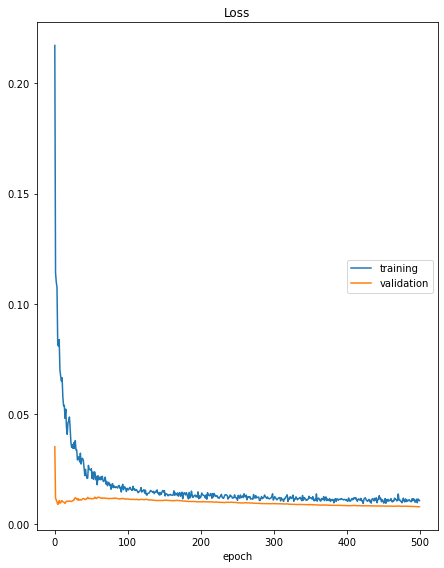

Loss
	training         	 (min:    0.009, max:    0.217, cur:    0.011)
	validation       	 (min:    0.008, max:    0.035, cur:    0.008)
11/11 [==============================] - 0s 27ms/step - loss: 0.0108 - val_loss: 0.0080


In [24]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=500,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular la predicción del modelo en el conjunto de prueba
yPred = model.predict(xTest)

# Calcular el MSE y el MAE en el conjunto de prueba
mse3 = mean_squared_error(yTest, yPred)
mae3 = mean_absolute_error(yTest, yPred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse3}")
print(f"Mean Absolute Error (MAE): {mae3}")

5/5 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.008035872521482206
Mean Absolute Error (MAE): 0.06530529437065125


Con base a la segunda red de dos capas, se toman los mismos parametros en optimizador, funciones de activación y función de perdida. Respecto al valor de Dropout se realizo una prueba con valores de 0.2 y 0.5. Tomando el segundo valor para el modelo ayuda evitar el sobreajuste en el entramiento de la red neuronal, sin embargo perdemos precisión, mientras al utilizar un valor de 0.2 sacrificamos parte de evitar el sobreajuste en el entranmiento, pero ganamos precisión en la predición de la variable objetivo.

En cuanto a EarlyStopping, se realizó ensayos con un valor de 2, 10 y 20 en el parametro patience. Encontramos un patròn en donde para valores màs altos el modelo entreno por más tiempo, En estos casos el rendimiento fue mayor, sin embargo, esto también podría llevar a un sobreajuste si se permite que el modelo continúe entrenando durante demasiado tiempo. En este caso el valor de 10 obtuvo un MSE no tan bajo en comparación al resto, pero se ajusto mejor a los datos de test

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

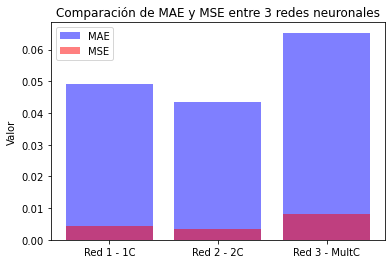

In [31]:
# Celda 4
import matplotlib.pyplot as plt
import numpy as np

# Definimos los valores de MAE y MSE para cada red neuronal
mae_values = [mae, mae2, mae3]
mse_values = [mse, mse2, mse3]

# Definimos los nombres de las redes neuronales
model_names = ['Red 1 - 1C', 'Red 2 - 2C', 'Red 3 - MultC']

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos la posición de las barras
x_pos = np.arange(len(model_names))

# Graficamos las barras de MAE y MSE
ax.bar(x_pos, mae_values, color='blue', alpha=0.5, label='MAE')
ax.bar(x_pos, mse_values, color='red', alpha=0.5, label='MSE')

# Agregamos las etiquetas de las barras y los nombres de las redes neuronales
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)
ax.set_ylabel('Valor')
ax.set_title('Comparación de MAE y MSE entre 3 redes neuronales')
ax.legend()

# Mostramos la gráfica
plt.show()

Después de analizar las métricas de las 3 redes neuronales, no se encontró una diferencia significativa entre ellas. Sin embargo, si se tuviera que elegir una red estrictamente en función de la métrica, se optaría por la red neuronal de 2 capas. No obstante, en el diseño de redes neuronales se debe considerar la complejidad de los datos. Por lo tanto, es necesario construir redes con dos o más capas para capturar esta complejidad.

En este caso, los datos no muestran un comportamiento muy complejo, pero una red neuronal de una sola capa podría no ser capaz de capturar cierta complejidad de los datos. Además, la función de activación predeterminada (lineal) no siempre es la mejor opción, dado que las variables de la base de datos son continuas, categóricas y ordinales.

La red multicapas (3 capas, con dropout y EarlyStopping) permite capturar relaciones complejas entre los datos y evitar el sobreajuste, lo que mejora la capacidad de generalización del modelo. Sin embargo, su uso requiere más recursos de tiempo (epochs) y computacionales.

Por lo tanto, se opta por el modelo de la red neuronal de 2 capas, que ofrece un equilibrio entre el rendimiento y los recursos requeridos, y tiene la mejor métrica (MSE).